### Importing the required Libraries

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the required data

In [358]:
# importing all the data
campaign_data = pd.read_csv('cupon_redemption/campaign_data.csv')
coupon_item_mapping = pd.read_csv('cupon_redemption/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('cupon_redemption/customer_demographics.csv')
customer_transaction_data = pd.read_csv('cupon_redemption/customer_transaction_data.csv')
item_data = pd.read_csv('cupon_redemption/item_data.csv')
train_data = pd.read_csv('cupon_redemption/train.csv') 
test_data = pd.read_csv('cupon_test.csv')

### Checking each data table

In [359]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [360]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [361]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [362]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [363]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [364]:
train_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [365]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


### Preparing data for the model

In [366]:
#definning a new dataframe as a copy of train_data
data = train_data

In [367]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [368]:
# definning a function to map all the table values into one table
def add_column(column_key,column_name,table_name):
    data[column_name]= data[column_key].map(table_name.set_index(column_key)[column_name])

# defining a function to map values explicitly from one table to other
def add_column_explicit(column_key,column_name,table_name):
    mapping = dict(table_name[[column_key, column_name]].values)
    data[column_name] = data[column_key].map(mapping)

In [369]:
add_column('campaign_id','campaign_type',campaign_data)
add_column('campaign_id','start_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('customer_id','age_range',customer_demographics)
add_column('customer_id','marital_status',customer_demographics)
add_column('customer_id','rented',customer_demographics)
add_column('customer_id','family_size',customer_demographics)
add_column('customer_id','no_of_children',customer_demographics)
add_column('customer_id','income_bracket',customer_demographics)

In [370]:
add_column_explicit('customer_id','item_id',customer_transaction_data)
add_column_explicit('customer_id','date',customer_transaction_data)
add_column_explicit('customer_id','quantity',customer_transaction_data)
add_column_explicit('customer_id','selling_price',customer_transaction_data)
add_column_explicit('customer_id','other_discount',customer_transaction_data)
add_column_explicit('customer_id','coupon_discount',customer_transaction_data)
add_column_explicit('item_id','brand',item_data)
add_column_explicit('item_id','brand_type',item_data)
add_column_explicit('item_id','category',item_data)

In [371]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,...,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,...,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,...,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,...,NaN,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,...,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat


In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
no_of_children       14056 non-null object
income_bracket       43661 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Cleaning the data by filling NaN

In [373]:
data['age_range'].mode()

0    46-55
dtype: object

In [374]:
data['age_range'].fillna('46-55',inplace=True)

In [375]:
data['age_range'].isnull().values.any()

False

In [376]:
data.groupby('marital_status').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,rented,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
marital_status,,,,,,,,,,,,,,,,,,,,,
Married,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811,...,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811
Single,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583,...,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583


In [377]:
data['age_range'].fillna('46-55',inplace=True)

In [378]:
data['marital_status'] = data['marital_status'].fillna(pd.Series(np.random.choice(['Married', 'Single'], 
                                                      p=[0.74,0.26], size=len(data))))

In [379]:
data.groupby('rented').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
rented,,,,,,,,,,,,,,,,,,,,,
0.0,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156,...,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156
1.0,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,...,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505


In [380]:
data['rented'] = data['rented'].fillna(pd.Series(np.random.choice([0.0, 1.0], 
                                                      p=[0.94,0.06], size=len(data))))

In [381]:
data.groupby('family_size').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
family_size,,,,,,,,,,,,,,,,,,,,,
1,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612,...,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612
2,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888,...,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888
3,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,...,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267
4,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,...,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139
5+,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,...,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755


In [382]:
data.groupby('family_size').count()['id']/43661

family_size
1     0.311766
2     0.386798
3     0.143538
4     0.071895
5+    0.086004
Name: id, dtype: float64

In [383]:
data['family_size'] = data['family_size'].fillna(pd.Series(np.random.choice(['1','2','3','4','5+'], 
                                                      p=[0.32,0.39,0.14,0.07,0.08], size=len(data))))

In [384]:
data.groupby('no_of_children').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
no_of_children,,,,,,,,,,,,,,,,,,,,,
1,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,...,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540
2,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,...,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
3+,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,...,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969


In [385]:
data.groupby('no_of_children').count()['id']/14056

no_of_children
1     0.465282
2     0.252348
3+    0.282371
Name: id, dtype: float64

In [386]:
data['no_of_children'] = data['no_of_children'].fillna(pd.Series(np.random.choice(['1','2','3+'], 
                                                      p=[0.47,0.25,0.28], size=len(data))))

In [387]:
ind = data.groupby('income_bracket').count().index

In [388]:
percents = data.groupby('income_bracket').count()['id']/43661

In [389]:
data['income_bracket'] = data['income_bracket'].fillna(pd.Series(np.random.choice(ind, 
                                                      p=percents, size=len(data))))

In [390]:
#checking the clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
no_of_children       78369 non-null object
income_bracket       78369 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Checking up the correlation heatmap before feature engineering

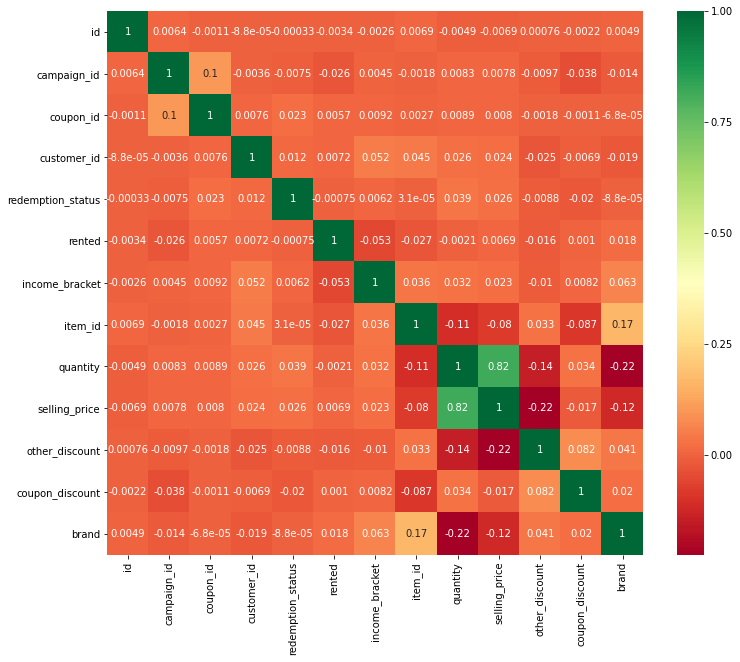

In [392]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)